# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

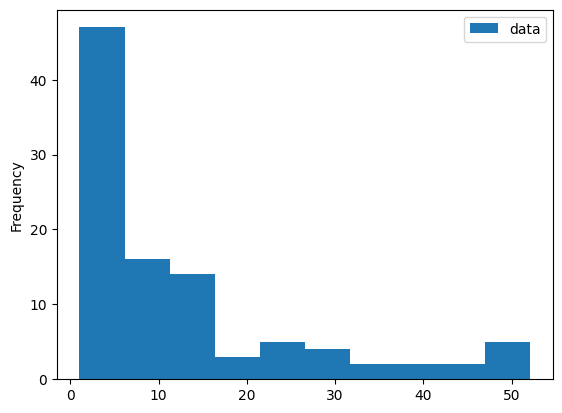

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

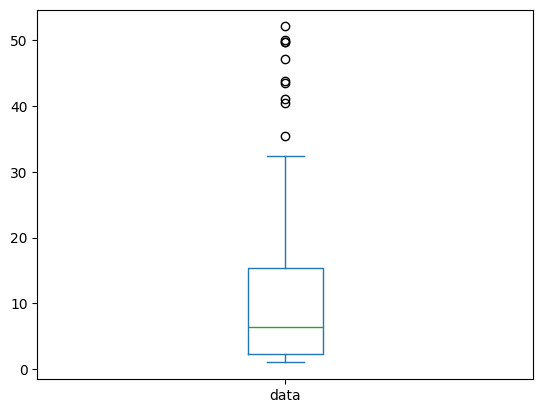

In [3]:
df.plot.box()


Both histograms and boxplots are useful for understanding data distributions, but they serve slightly different purposes.

**Histogram Pros:**
- Shows the *shape* of the distribution clearly.
- Good for identifying skewness, modality (e.g. bimodal distributions), and approximate density.
- Allows for flexible bin widths to reveal hidden patterns.

**Histogram Cons:**
- Can be sensitive to bin size — too few or too many bins can obscure the data.
- Doesn’t show precise values like quartiles or outliers.

**Boxplot Pros:**
- Very compact summary: median, quartiles, min, max, and outliers.
- Makes it easy to compare multiple distributions side-by-side.
- Useful for spotting outliers quickly.

**Boxplot Cons:**
- Doesn’t show actual shape of distribution (e.g. bimodality or skew).
- Less intuitive for some users who aren’t familiar with quartiles.

**Preferred Option & Suggestions:**
I would choose the histogram for the administrator’s goal — understanding the cost *distribution* of expensive drugs — but I would also use a **boxplot alongside it** to clearly flag outliers.

To improve clarity:
- Add reference lines at the median and 75th percentile on the histogram.
- Use color contrast or shading to highlight the top quartile in both plots.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

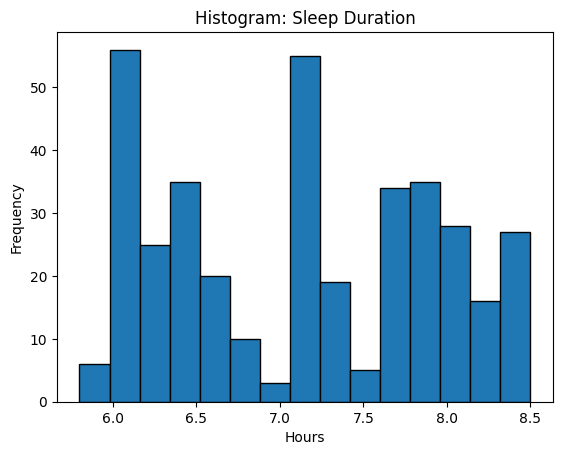

In [5]:
plt.hist(df["Sleep Duration"], bins=15, edgecolor='black')
plt.title("Histogram: Sleep Duration")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()


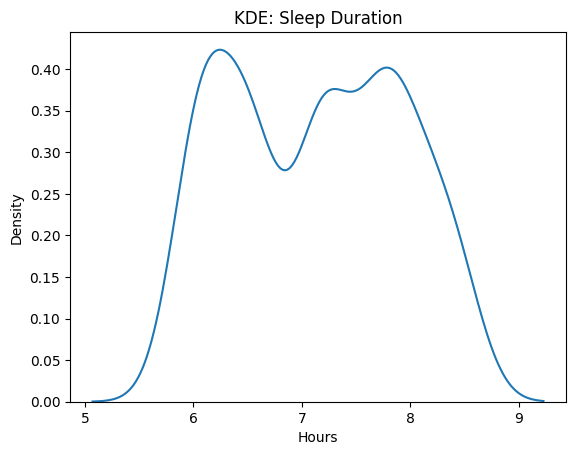

In [6]:
sns.kdeplot(df["Sleep Duration"])
plt.title("KDE: Sleep Duration")
plt.xlabel("Hours")
plt.show()

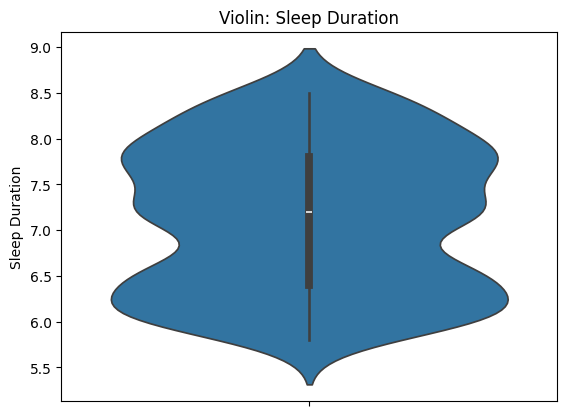

In [7]:
sns.violinplot(y=df["Sleep Duration"])
plt.title("Violin: Sleep Duration")
plt.show()


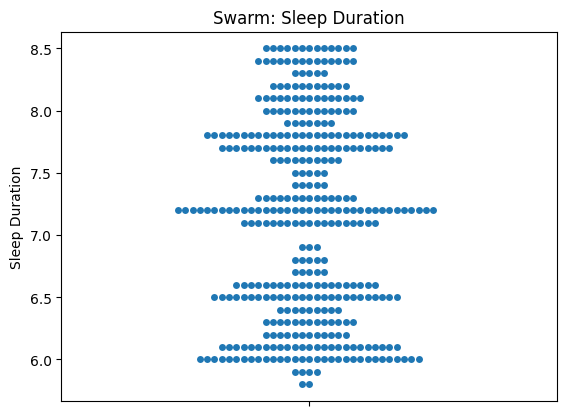

In [8]:
sns.swarmplot(y=df["Sleep Duration"])
plt.title("Swarm: Sleep Duration")
plt.show()

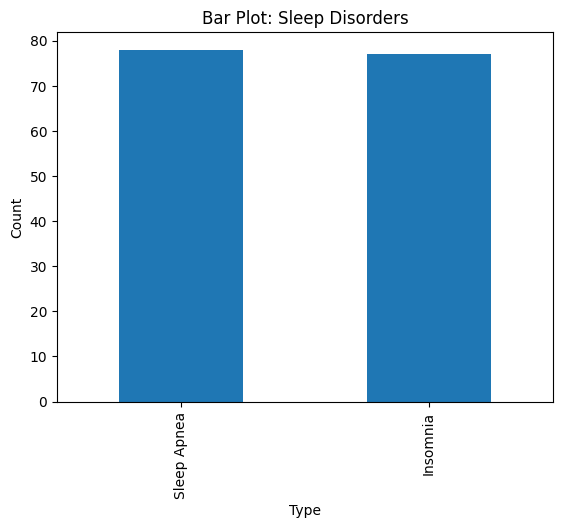

In [9]:
df["Sleep Disorder"].value_counts().plot(kind="bar")
plt.title("Bar Plot: Sleep Disorders")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [10]:
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])

Mean:
 Person ID                   187.500000
Age                          42.184492
Sleep Duration                7.132086
Quality of Sleep              7.312834
Physical Activity Level      59.171123
Stress Level                  5.385027
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64
Median:
 Person ID                   187.5
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              7.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64
Mode:
 Person ID                     1.0
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              8.0
Physical Activity Level      60.0
Stress Level                  3.0
Heart Rate                   68.0
Daily Steps                8000.0
Name: 0, dtype: float64


Conclusions

- The distribution of Sleep Duration is slightly left-skewed, with most values between 6–9 hours.
- Violin and KDE plots show a strong central mass around 7–8 hours.
- There are some outliers with very low or very high sleep hours.
- The histogram’s shape is unimodal.
- Changing the bin size of the histogram did not reveal significant additional patterns.
- The dataset appears clean and usable, with good variability across features.


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

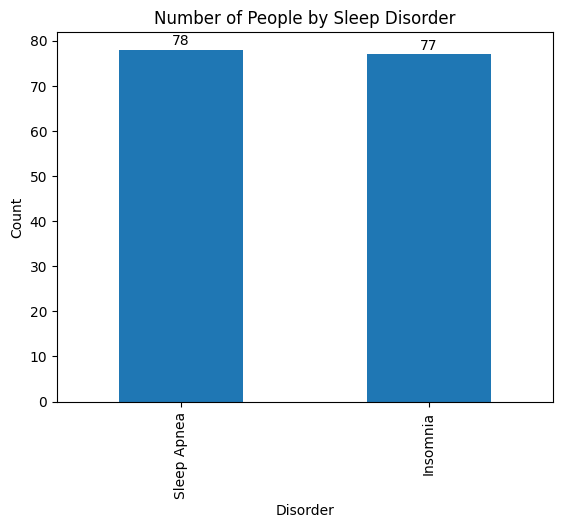

In [11]:
sleep_disorder_counts = df["Sleep Disorder"].value_counts()

sleep_disorder_counts.plot(kind="bar")
plt.title("Number of People by Sleep Disorder")
plt.xlabel("Disorder")
plt.ylabel("Count")

# Annotate each bar with its value
for index, value in enumerate(sleep_disorder_counts):
    plt.text(index, value + 1, str(value), ha='center')

plt.show()